In [1]:
# We append to system path as we are not using the pip version of ProcessOptimizer. 
# Be sure to inser the correct path to ProcessOptimizer here:

import sys
sys.path.append('/home/sigurd/dev/ProcessOptimizer')
from ProcessOptimizer.benchmarks import branin as branin
from ProcessOptimizer.benchmarks import hart6 as hart6_
from ProcessOptimizer.plots import plot_objective
from ProcessOptimizer import gp_minimize, forest_minimize, dummy_minimize
from ProcessOptimizer import plots
import time

In [2]:
# For reproducibility
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

<Figure size 432x288 with 0 Axes>

In [3]:
# Here we define a function that we evaluate.
def funny_func(x):
    s = 0
    for i in range(len(x)):
        s += (x[i]*i)**2
    return s

In [4]:
import time
from ProcessOptimizer.plots import dependence
from ProcessOptimizer.plots import _evenly_sample

In [5]:
bounds = [(-1, 1.),] * 4
n_calls = 10
result = gp_minimize(funny_func, bounds, n_calls=n_calls, base_estimator="ET",
                              random_state=4)

In [6]:
space = result.space
model = result.models[-1]
i=1
j=1
sample_points =None
n_samples = 10000
n_points = 10
x_eval = None
#x_eval=[0,0,0,0]

In [102]:
start=time.time()
dependence(space, model, i, j=j, sample_points=sample_points,
                       n_samples=n_samples, n_points=n_points, x_eval = x_eval)
end = time.time()-start

In [13]:
40*40*0.005

8.0

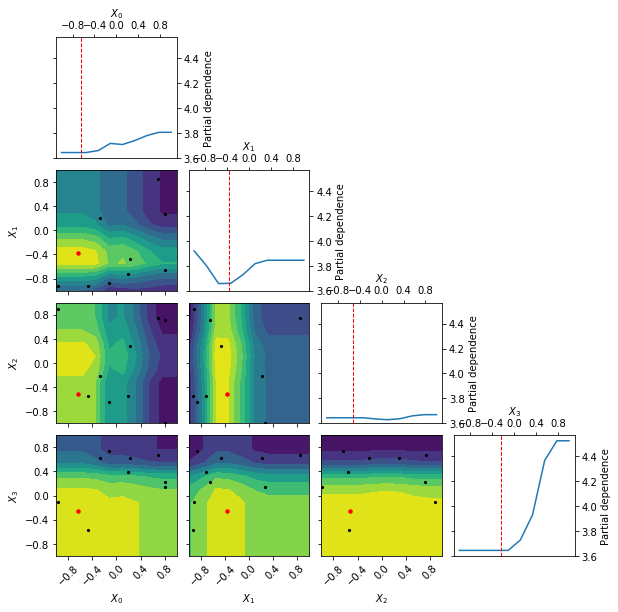

In [38]:
start=time.time()
a,b,c = plot_objective(result,usepartialdependence = True, n_points = 10)
end = time.time()-start

In [40]:
end

2.9773550033569336

In [41]:
c

array([[0.04350829, 0.        , 0.        , 0.        ],
       [0.43059778, 0.04322696, 0.        , 0.        ],
       [0.43130684, 0.43199015, 0.04327679, 0.        ],
       [0.43139291, 0.43155718, 0.4320128 , 0.04367852]])

In [42]:
b-np.sum(c)

0.18636274337768555

In [11]:
b

3.0050735473632812

In [9]:
c

array([[0.04329324, 0.        , 0.        , 0.        ],
       [0.43493581, 0.04381442, 0.        , 0.        ],
       [0.43472171, 0.43327022, 0.04370141, 0.        ],
       [0.43134046, 0.43250561, 0.4315834 , 0.04720044]])

In [12]:
np.sum(c)

2.776366710662842

In [14]:
plottingtime = b-np.sum(c)

In [15]:
plottingtime

0.22870683670043945

In [57]:
np.sum(np.arange(1,2,1))

1

In [54]:
for i in range(10):
    t = 1.2*10**(-6)
    p=250
    n = i
    res = 10
    k_par = res*n*(0.0035+t*p)+res**2*np.sum(np.arange(1,n,1))*(0.0035+t*p)+0.3
    k_no_par = res*n*(0.0035)+res**2*np.sum(np.arange(1,n,1))*(0.0035)+0.3
    print(str(i)+'           '+str(k_par)+'           '+str(k_no_par))

0           0.3           0.3
1           0.718           0.685
2           1.516           1.4200000000000002
3           2.6939999999999995           2.505
4           4.252           3.94
5           6.19           5.725
6           8.508000000000001           7.86
7           11.206000000000001           10.345
8           14.284           13.18
9           17.742           16.365000000000002


In [62]:
for i in range(10):
    t = 1.2*10**(-6)
    p=250
    n = i
    res = 40
    k_par = res*n*(t*p)+res**2*np.sum(np.arange(1,n,1))*(t*p)+0.3+0.0035*(np.sum(np.arange(1,n,1))+n)
    k_no_par = res*n*(t)+res**2*np.sum(np.arange(1,n,1))*(t)+0.3+0.0035*(np.sum(np.arange(1,n,1))+n)
    print(str(i)+'           '+str(k_par)+'           '+str(k_no_par))

0           0.3           0.3
1           0.3155           0.303548
2           0.8145           0.312516
3           1.797           0.32690400000000003
4           3.263           0.346712
5           5.2124999999999995           0.37194
6           7.645499999999999           0.402588
7           10.562           0.43865599999999993
8           13.962           0.480144
9           17.845499999999998           0.527052


In [32]:
1.2*10**(-6)

1.2e-06

In [27]:
np.sum(np.arange(1,11,1))

55

In [ ]:
np.sum()

In [92]:
start=time.time()
predict_time = 0
if x_eval is None:
    sample_points = space.transform(space.rvs(n_samples=n_samples))
else:
    sample_points = space.transform([x_eval])
dim_locs = np.cumsum([0] + [d.transformed_size for d in space.dimensions])
xi, xi_transformed = _evenly_sample(space.dimensions[j], n_points)
yi, yi_transformed = _evenly_sample(space.dimensions[i], n_points)

zi = []
for x_ in xi_transformed:
    row = []
    for y_ in yi_transformed:
        rvs_ = np.array(sample_points)      # copy
        rvs_[:, dim_locs[j]:dim_locs[j + 1]] = x_
        rvs_[:, dim_locs[i]:dim_locs[i + 1]] = y_
        predict_start = time.time()
        #row.append(np.mean(model.predict(rvs_)))
        model.predict(rvs_)
        predict_time+=time.time()-predict_start
    zi.append(row)
total_time = time.time()-start

In [93]:
total_time

0.4599580764770508

In [94]:
predict_time

0.4582834243774414

In [66]:
start=time.time()
Ni=7
Nj=20
times = np.zeros([Ni,Nj])
x=np.zeros(Nj)
for ti in range(Ni):
    print(ti)
    n_pars =ti+1
    bounds = [(-1, 1.),] * n_pars
    n_calls = 10
    result = gp_minimize(funny_func, bounds, n_calls=n_calls, base_estimator="ET",
                              random_state=4,n_jobs=-1)
    model = result.models[-1]
    for tj in range(Nj):
        n_vals = 2**(tj)
        rvs = np.random.rand(n_vals,n_pars)
        #_=model.predict(rvs)
        predict_start = time.time()
        _=model.predict(rvs)
        predict_time=time.time()-predict_start
        times[ti,tj] = predict_time
        x[tj] = n_vals
total_time = time.time()-start
diff_time = total_time-np.sum(times)

0
1
2
3
4
5
6


In [65]:
times1=times
diff_time1=diff_time
total_time1 = total_time

In [68]:
total_time

9.411543369293213

In [69]:
total_time1

9.975207328796387

In [7]:
n_pars =4
n_vals = 1000000
bounds = [(-1, 1.),] * n_pars
n_calls = 10
result = gp_minimize(funny_func, bounds, n_calls=n_calls, base_estimator="ET",
                          random_state=4,n_jobs=-1)
rvs = np.random.rand(n_vals,n_pars)
#_=model.predict(rvs)
model=result.models[-1]
predict_start = time.time()
_=model.predict(rvs)
predict_time=time.time()-predict_start

In [8]:
predict_time

1.09639573097229

In [80]:
predict_time

1.0976972579956055

In [67]:
times

array([[0.00444484, 0.00415087, 0.00415087, 0.00413489, 0.00415635,
        0.00415969, 0.0041728 , 0.0042758 , 0.00434685, 0.00444078,
        0.00457239, 0.00486755, 0.00540853, 0.00651622, 0.00864577,
        0.01374054, 0.02484584, 0.04280305, 0.09744549, 0.24618244],
       [0.00440717, 0.00413442, 0.00413871, 0.00414395, 0.0041492 ,
        0.00445414, 0.00478959, 0.00448585, 0.00475001, 0.00517368,
        0.00531578, 0.00608754, 0.00782681, 0.01131058, 0.01807785,
        0.03247666, 0.0590322 , 0.12243414, 0.25797367, 0.5525465 ],
       [0.00507164, 0.00423837, 0.00419068, 0.00421357, 0.00424075,
        0.00452375, 0.00455832, 0.00449419, 0.00450349, 0.00480509,
        0.00527048, 0.00622344, 0.00811243, 0.01179743, 0.01917601,
        0.03368306, 0.06465721, 0.12965155, 0.28142023, 0.60574961],
       [0.00457144, 0.00437069, 0.00455642, 0.00439   , 0.00424743,
        0.00416756, 0.00420976, 0.00437808, 0.00450253, 0.00481462,
        0.00525665, 0.00622725, 0.00806141, 0

In [64]:
diff_time1=diff_time

1.7927215099334717

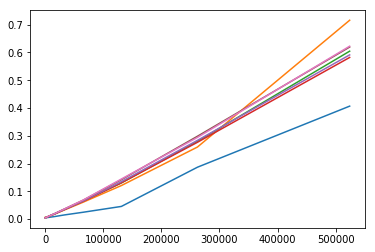

In [26]:
plt.plot(x,times.T)
plt.show()

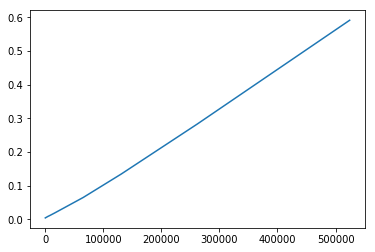

In [38]:
plt.plot(x[7:],times[4,7:])
plt.show()

In [41]:
x_org =x

In [56]:
y=times[4,7:]
x=x_org[7:]

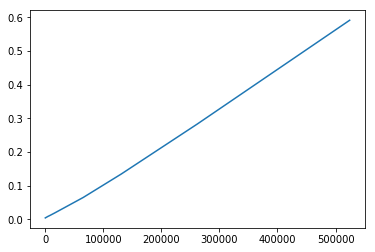

In [57]:
plt.plot(x,y)

In [43]:
from scipy.optimize import curve_fit

In [58]:
z = np.polyfit(x, y, 1)
f = np.poly1d(z)

In [59]:
z

array([1.11072520e-06, 7.17313686e-04])

In [62]:
f

poly1d([1.11072520e-06, 7.17313686e-04])

In [64]:
y

array([0.00439095, 0.00452781, 0.00483513, 0.00531316, 0.00627136,
       0.00832582, 0.01179576, 0.01915169, 0.03448582, 0.06520653,
       0.13485575, 0.28345227, 0.59125066])

In [68]:
x*z[0]+z[1]

array([0.00085949, 0.00100166, 0.001286  , 0.0018547 , 0.00299208,
       0.00526684, 0.00981637, 0.01891544, 0.03711356, 0.0735098 ,
       0.14630229, 0.29188726, 0.58305721])

In [66]:
z

array([1.11072520e-06, 7.17313686e-04])

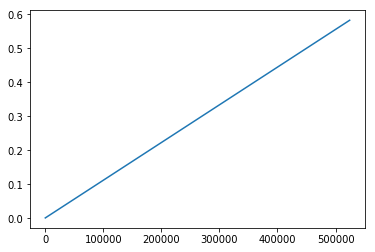

In [60]:
plt.plot(x,f(x))

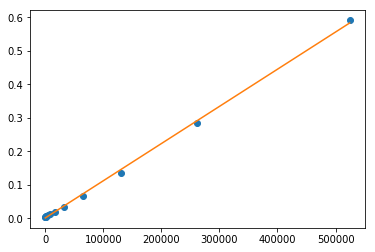

In [71]:
plt.plot(x,y,'o',x,x*z[0]+z[1])

In [32]:
times[1,5]/times[0,5]

2.658024422307676

In [33]:
times[1,4]/times[0,4]

1.847875633568051

In [34]:
times[1,3]/times[0,3]

1.1862861264231621

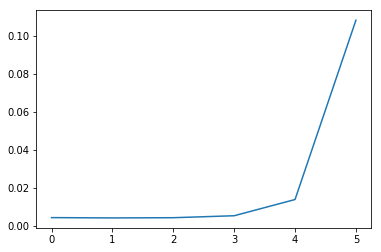

In [28]:
plt.plot(times[6,:])
plt.show()

In [96]:
times

array([0.00527859, 0.00482535, 0.00704646, 0.00519633, 0.00617647,
       0.00976276, 0.02446723, 0.08321452, 0.35609841, 1.49867797])

In [90]:
times

array([0.00579882, 0.00447083, 0.00582767, 0.00509119, 0.00671005,
       0.01006627, 0.02496409, 0.08510232, 0.36560369, 1.49272609])

In [88]:
diff_time

0.00037550926208496094

In [81]:
times

array([[7.16706538, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.17421937, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.17961788, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.18629694, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.19079566, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.19520164, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.19982839, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [7.20474148, 0.        , 0.       

In [69]:
a=np.random.rand(4,4)

In [73]:
3**10

59049

In [70]:
np.sum(a)

7.44886351575495

In [45]:
predict_time

7.1039488315582275

In [46]:
total_time

7.117343902587891

In [68]:
rvs = np.random.rand(400000,4)

In [65]:
_=model.predict(rvs)

In [30]:
rvs

array([[0.66314239, 0.8397864 ]])

In [32]:
model.predict(rvs)

array([2.65486425, 3.63645531, 2.91314651, 2.54882607, 2.61123682,
       4.99105786, 2.74935835, 5.06006593, 4.83884573, 3.14724992])

In [27]:
end

7.105890512466431

In [24]:
end

9.432214975357056

In [20]:
end

7.62216329574585

In [17]:
end

0.19819879531860352

In [21]:
7.6/40

0.19